In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('/home/alpha/2410/2410-machine-learning/data/diabetes_cleaned.csv')
df.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,181,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,1.136,33,1


In [4]:
X = df.drop('outcome', axis=1)
y = df['outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy: 75.97%


In [7]:
df['outcome'].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

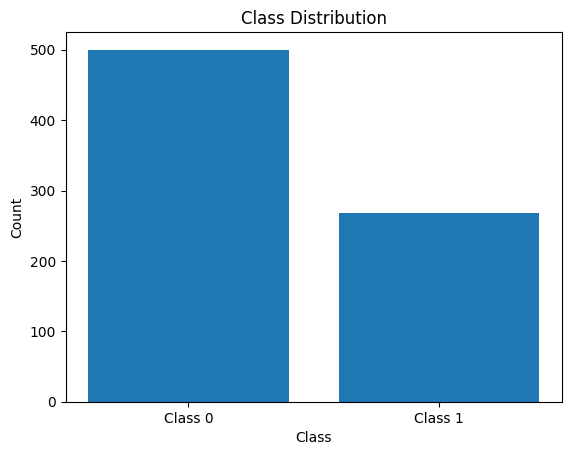

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
X=df.drop(["outcome"],axis=1)
y=df["outcome"]

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()


In [9]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
X,y=smote.fit_resample(X,y)
y.value_counts()


outcome
1    500
0    500
Name: count, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy: 80.50%
